In [2]:
import numpy as np
import scipy as sp

data = sp.genfromtxt("web_traffic.tsv", delimiter="\t")

In [3]:
x = data[:,0]
y = data[:,1]

sp.sum(sp.isnan(y))

8

In [6]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

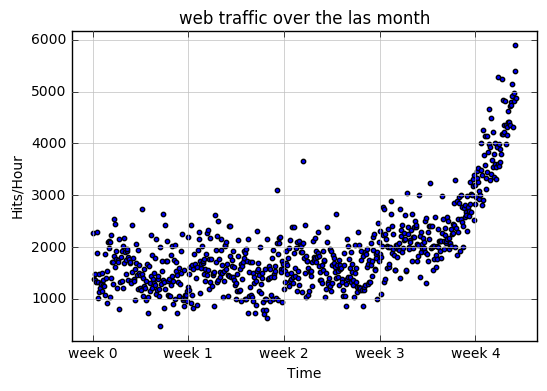

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x,y,s=10)
plt.title("web traffic over the las month")
plt.xlabel("Time")
plt.ylabel("Hits/Hour")
plt.xticks([w*7*24 for w in range(10)],['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
plt.show()

In [8]:
def error(f, x, y):
    return sp.sum((f(x)-y)**2)

In [9]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)

In [10]:
print("Model parameters: %s" % fp1)

Model parameters: [   2.59619213  989.02487106]


In [11]:
f1 = sp.poly1d(fp1)

In [12]:
print(error(f1,x,y))

317389767.34


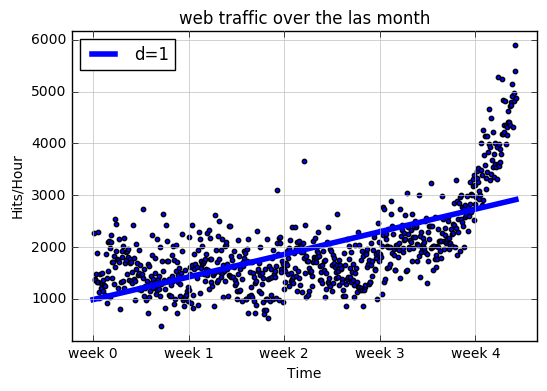

In [13]:
import matplotlib.pyplot as plt

plt.scatter(x,y,s=10)
plt.title("web traffic over the las month")
plt.xlabel("Time")
plt.ylabel("Hits/Hour")
plt.xticks([w*7*24 for w in range(10)],['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
fx = sp.linspace(0,x[-1], 1000)
plt.plot(fx, f1(fx), linewidth=4)
plt.legend(["d=%i" % f1.order], loc="upper left")
plt.show()

In [14]:
f2p = sp.polyfit(x, y, 2)
print(f2p)

[  1.05322215e-02  -5.26545650e+00   1.97476082e+03]


In [17]:
f2 = sp.poly1d(f2p)
print(error(f2, x, y))

179983507.878


In [24]:
f3p = sp.polyfit(x,y,3)
f3 = sp.poly1d(f3p)

f4p = sp.polyfit(x,y,10)
f4 = sp.poly1d(f4p)

f5p = sp.polyfit(x,y,53)
f5 = sp.poly1d(f5p)


/Users/Marku/anaconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


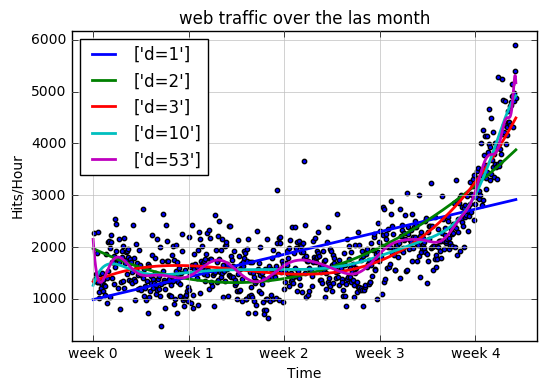

In [27]:
import matplotlib.pyplot as plt

plt.scatter(x,y,s=10)
plt.title("web traffic over the las month")
plt.xlabel("Time")
plt.ylabel("Hits/Hour")
plt.xticks([w*7*24 for w in range(10)],['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
fx = sp.linspace(0,x[-1], 1000)

plt.plot(fx, f1(fx), linewidth=2)
plt.plot(fx, f2(fx), linewidth=2)
plt.plot(fx, f3(fx), linewidth=2)
plt.plot(fx, f4(fx), linewidth=2)
plt.plot(fx, f5(fx), linewidth=2)


plt.legend([["d=%i" % f1.order],["d=%i" % f2.order],["d=%i" % f3.order],["d=%i" % f4.order],["d=%i" % f5.order]], loc="upper left")
plt.show()

In [34]:
inflection = 3.5*7*24 # calculate the inflection point in hours
xa = x[:inflection] # data before the inflection point
ya = y[:inflection]

xb = x[inflection:] # data after
yb = y[inflection:]

fa = sp.poly1d(sp.polyfit(xa, ya, 53))
fb = sp.poly1d(sp.polyfit(xb, yb, 2))

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error after inflection=%f" % fa_error )
print("Error inflection=%f" % (fa_error + fb_error))
print("Error before inflection=%f" % fb_error )

Error after inflection=89714678.006005
Error inflection=109483524.995182
Error before inflection=19768846.989176


/Users/Marku/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/Users/Marku/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/Marku/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Marku/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Marku/anaconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


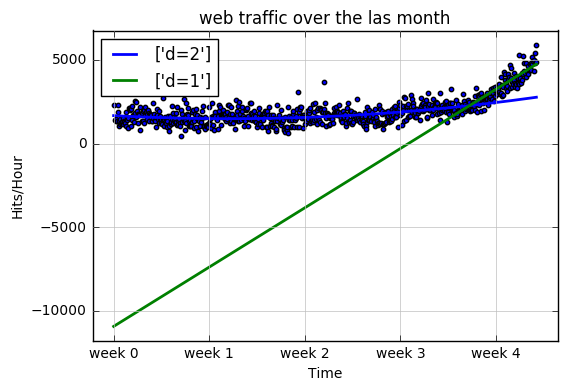

In [32]:
import matplotlib.pyplot as plt

plt.scatter(x,y,s=10)
plt.title("web traffic over the las month")
plt.xlabel("Time")
plt.ylabel("Hits/Hour")
plt.xticks([w*7*24 for w in range(10)],['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
fx = sp.linspace(0,x[-1], 1000)

plt.plot(fx, fa(fx), linewidth=2)
plt.plot(fx, fb(fx), linewidth=2)



plt.legend([["d=%i" % fa.order],["d=%i" % fb.order]], loc="upper left")
plt.show()